https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
circuits = pd.read_csv('circuits.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
driver_standings = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
seasons = pd.read_csv('seasons.csv')
sprint_results = pd.read_csv('sprint_results.csv')
status = pd.read_csv('status.csv')

In [4]:
# merge results with races
age_distro = results[['resultId', 'raceId', 'driverId', 'position']].merge(races[['raceId', 'date']], on='raceId')

In [5]:
# merge with drivers
age_distro = age_distro.merge(drivers[['driverId', 'dob']], left_on='driverId', right_on='driverId')

In [6]:
# reformat columns to datetime
age_distro.date = pd.to_datetime(age_distro.date)
age_distro.dob = pd.to_datetime(age_distro.dob)

In [7]:
# function to calculate driver age at a specific time
def age_calc(row):
    adjust = 0
    if (row.date.month, row.date.day) < (row.dob.month, row.dob.day):
        adjust = 1
    return row.date.year - row.dob.year - adjust

In [8]:
# calculate race age (drivers age at time of race) and put in new column
age_distro['race_age'] = age_distro.apply(lambda row: age_calc(row), axis=1)

# create a column indicating the decade of each race
age_distro['decade'] = age_distro.apply(lambda row: str(row['date'].year)[:-1] + '0s', axis=1)

In [9]:
# sort values by decade
age_distro = age_distro.sort_values(by='decade')

In [48]:
age_distro.describe().T

,count,mean,std,min,25%,50%,75%,max
resultId,25840.0,12921.334327,7460.682031,1.0,6460.75,12920.5,19380.25,25845.0
raceId,25840.0,531.425813,299.440908,1.0,293.00,514.0,784.00,1096.0
driverId,25840.0,261.732082,268.623016,1.0,56.00,163.0,360.00,856.0
race_age,25840.0,29.537577,5.256881,17.0,26.00,29.0,33.00,58.0


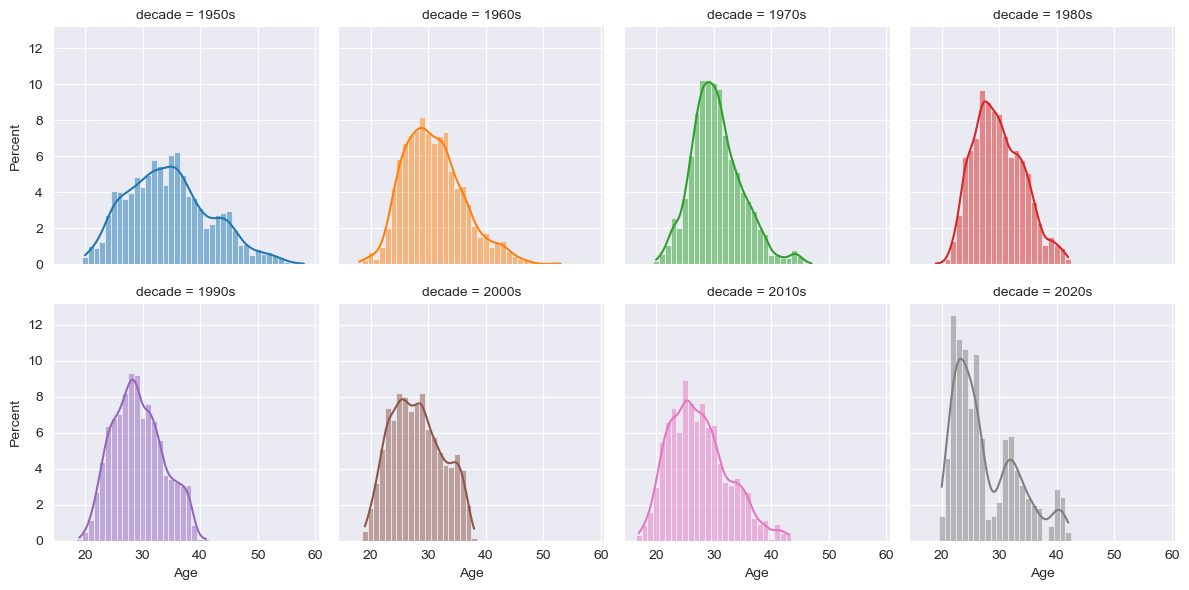

In [11]:
# plot facet grid per decade
age_grid = sns.FacetGrid(age_distro, col = 'decade', col_wrap=4, hue = 'decade', height = 3)
age_grid.map(sns.histplot, 'race_age', **{'stat':'percent', 'discrete':True, 'kde':True})
age_grid.set_axis_labels('Age', 'Percent')


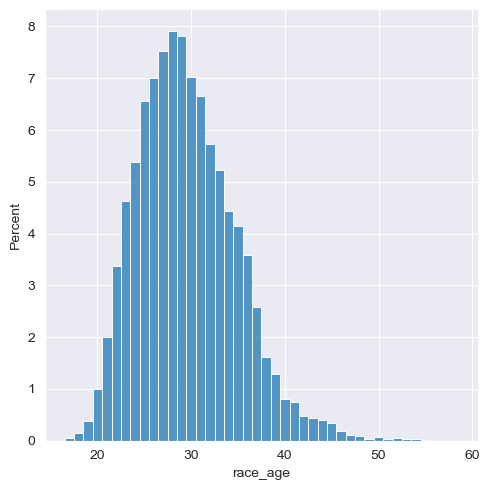

In [13]:
# distribution of race age across all races
race_age_distro = sns.displot(age_distro, x='race_age', stat='percent', discrete=True)

In [14]:
# create new subset of only winning results
win_distro = age_distro[age_distro.position != '\\N']
win_distro = win_distro.astype({'position':'int'})
win_distro = win_distro[win_distro.position <= 1]

Text(0.5, 1.0, 'Driver Age Distribution (1950-Present)')

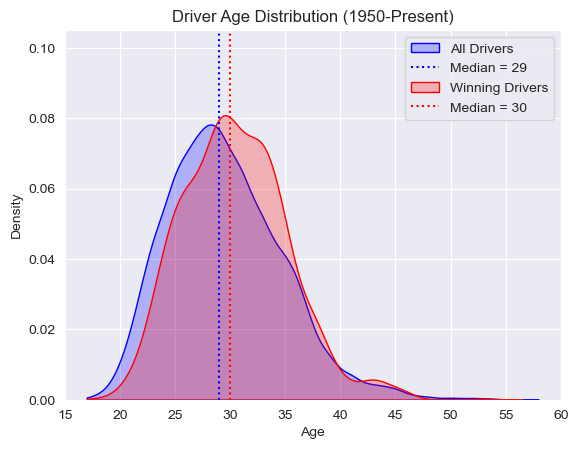

In [53]:
# plot all time distribution of race age and win age
start_year = 1950
sns.kdeplot(data=age_distro[age_distro.date.dt.year>=start_year], clip=(17,58), x='race_age', label ='All Drivers', color='blue', fill=True)
plt.axvline(x=29, color='blue', label='Median = 29', linestyle='dotted')
sns.kdeplot(data=win_distro[win_distro.date.dt.year>=start_year], clip=(17,58), x='race_age', label ='Winning Drivers', color='red', fill=True)


plt.axvline(x=30, color='red', label='Median = 30', linestyle='dotted')
plt.legend()
plt.ylim(0,.105)
plt.xlim(15,60)
plt.xlabel('Age')
plt.title('Driver Age Distribution (1950-Present)')

Text(0.5, 1.0, 'Driver Age Distribution (2013-Present)')

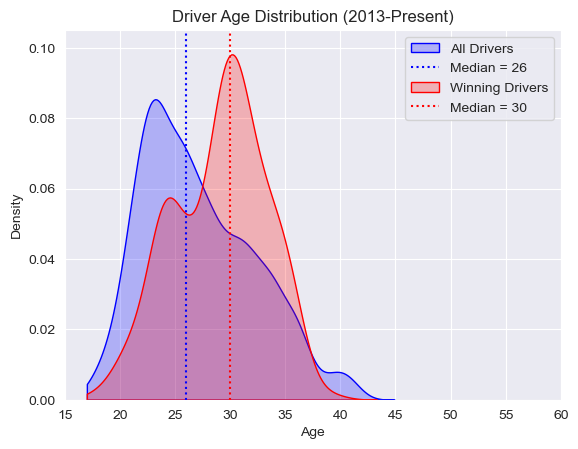

In [54]:
# same plot but only 2013-Present
start_year = 2013
sns.kdeplot(data=age_distro[age_distro.date.dt.year>=start_year], clip=(17,58), x='race_age', label ='All Drivers', color='blue', fill=True)
plt.axvline(x=26, color='blue', label='Median = 26', linestyle='dotted')
sns.kdeplot(data=win_distro[win_distro.date.dt.year>=start_year], clip=(17,58), x='race_age', label ='Winning Drivers', color='red', fill=True)


plt.axvline(x=30, color='red', label='Median = 30', linestyle='dotted')
plt.legend()
plt.ylim(0,.105)
plt.xlim(15,60)
plt.xlabel('Age')
plt.title('Driver Age Distribution (2013-Present)')